In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
email = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/emails.csv",index_col=0)
email.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [3]:
X = email.drop('Prediction',axis=1)
y = email['Prediction']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2021,
                                                    stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
print(pca.explained_variance_)

[2.15493381e+02 7.18181814e+01 4.61298124e+01 ... 1.65331636e-30
 2.65407401e-33 6.57427125e-34]


In [7]:
print(np.sum(pca.explained_variance_)) 

3000.5801585766776


In [8]:
print(pca.explained_variance_ratio_)  

[7.18172385e-02 2.39347651e-02 1.53736311e-02 ... 5.50998899e-34
 8.84520284e-37 2.19100004e-37]


In [9]:
print(pca.explained_variance_ratio_ * 100)

[7.18172385e+00 2.39347651e+00 1.53736311e+00 ... 5.50998899e-32
 8.84520284e-35 2.19100004e-35]


In [10]:
cols=[]
for i in range(1,3001):
    colname='V'+str(i)
    cols.append(colname)

In [11]:
df_plot = pd.DataFrame(principalComponents,
                 columns =cols,
                 index = X.index)
df_plot

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2991,V2992,V2993,V2994,V2995,V2996,V2997,V2998,V2999,V3000
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,-8.069820,-2.853980,0.793445,0.705470,0.625930,0.572822,0.851702,-0.224271,-0.558688,-0.546656,...,-0.005616,0.005020,0.000402,0.000722,-0.000018,-1.102188e-14,4.111980e-16,-1.276126e-16,-9.543022e-17,2.605147e-17
Email 2,7.878270,4.976493,-5.978319,1.963689,-3.643903,0.635873,-1.654378,0.218844,0.615383,0.115129,...,-0.002116,-0.001564,0.002590,-0.001614,0.000008,-1.222272e-15,2.098027e-16,-9.686140e-17,-3.313745e-18,-7.781207e-18
Email 3,-7.866094,-2.731081,0.415667,0.730907,0.573790,0.639172,0.677553,-0.307079,0.195296,-0.528663,...,-0.003294,0.001795,0.001089,0.003128,0.000016,1.076669e-14,-5.642145e-16,-8.514314e-17,1.212431e-16,-4.580540e-17
Email 4,-1.798441,2.859713,-5.403537,0.602499,-0.934836,-0.020407,-4.107945,3.589779,-0.471903,1.383270,...,-0.000288,-0.001904,0.003875,-0.001964,0.000022,-1.477540e-15,2.979683e-16,3.633498e-16,1.524524e-17,-9.094522e-18
Email 5,-2.058668,2.258581,-4.651082,0.668596,-0.464576,0.514556,-2.843918,3.138005,0.222455,-0.612365,...,-0.001134,0.002464,-0.000420,-0.003357,-0.000044,2.790030e-15,7.532700e-16,-2.007455e-15,-6.635809e-17,-1.817596e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 5168,-4.533149,-0.290261,0.335193,-1.350454,0.420171,-1.254681,-1.348878,1.039854,-0.215238,-1.921760,...,0.001176,-0.003168,-0.001110,-0.002234,-0.000007,9.029287e-15,3.866847e-16,-1.904284e-15,5.834667e-18,2.945815e-17
Email 5169,14.670023,3.763993,-2.729205,-2.611508,2.933871,-4.286780,-5.514696,-0.097194,2.005806,-1.371104,...,-0.002788,-0.001395,-0.001612,-0.003391,0.000042,-3.152310e-15,-3.412783e-16,5.678931e-16,-1.719338e-17,-2.590107e-17
Email 5170,-6.894497,-3.555798,0.649079,0.543395,0.458468,0.598030,1.312974,-0.245991,-0.007529,-1.029179,...,-0.000844,-0.001964,-0.002735,0.007051,-0.000034,-1.454066e-16,1.070309e-15,-8.788492e-16,2.371495e-17,-1.697749e-17


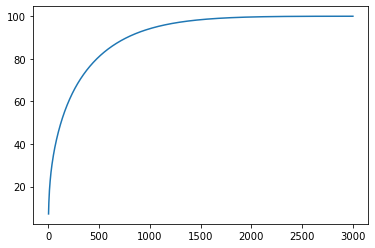

In [12]:
import matplotlib.pyplot as plt
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,3001)
plt.plot(x,y)
plt.show()



In [14]:
sum=np.cumsum(pca.explained_variance_ratio_ * 100)
sum.shape

(3000,)

In [39]:
j=0
for i in sum:
    if i<= 80:
        j=j+1
j

476

In [40]:
col=[]
for i in range(1,3001):
    colname='V'+str(i)
    col.append(colname)

In [41]:
pca_loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=col )
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2991,V2992,V2993,V2994,V2995,V2996,V2997,V2998,V2999,V3000
the,0.058976,0.009062,-0.020221,-0.022750,-0.006833,-0.031286,-0.021420,-0.013194,-0.002573,0.020103,...,-0.011923,-0.016615,0.014645,0.012761,-6.030384e-05,-3.576119e-15,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
to,0.062107,0.022344,-0.003640,-0.009704,0.001683,-0.006766,-0.017436,-0.005803,0.005372,0.012067,...,-0.014882,0.039225,-0.000971,0.004019,1.136673e-04,6.931138e-17,-1.517376e-16,3.919208e-17,-5.468529e-16,-3.239088e-17
ect,0.024515,0.039875,-0.068496,0.012306,-0.024535,0.016844,-0.009093,0.013765,0.011134,-0.040807,...,-0.109234,-0.433196,-0.454286,-0.042001,-2.373145e-04,-2.211367e-15,7.957876e-16,-4.305553e-15,-3.589492e-16,1.353885e-15
and,0.059956,0.005732,-0.000294,-0.023291,-0.000490,-0.020939,0.011068,-0.021868,-0.004867,0.013265,...,0.013325,-0.003420,0.012184,0.000745,-1.979537e-07,8.501079e-16,-1.337766e-15,2.669421e-16,5.538589e-16,-2.081850e-16
for,0.054779,0.008825,-0.019564,-0.023856,-0.017325,-0.004043,-0.029455,-0.003601,0.013066,0.012837,...,-0.005227,0.008166,-0.003355,0.004827,9.187894e-05,1.672121e-16,3.022554e-17,-1.554570e-16,2.435689e-16,1.269499e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
infrastructure,0.008256,0.001012,0.010103,-0.006264,-0.003388,-0.009796,0.012237,-0.023052,0.000090,0.006502,...,-0.002539,0.001702,-0.003583,-0.000916,1.095348e-05,6.957505e-17,4.409616e-17,-2.660773e-17,8.849672e-17,-1.982433e-16
military,0.006664,0.004834,0.005355,-0.001461,0.006670,-0.010681,0.014131,-0.001016,-0.007878,0.013749,...,-0.002022,0.000979,0.000747,0.000348,1.522033e-05,-5.680142e-17,2.018656e-17,-5.262624e-17,6.753961e-17,8.780888e-17
allowing,0.007774,0.002399,0.010064,-0.014879,-0.006683,-0.006604,0.011147,-0.024329,0.001226,0.009470,...,-0.002700,-0.001911,0.000541,-0.001034,-4.860567e-05,-5.660040e-17,4.462122e-17,1.581281e-16,-3.031717e-17,-9.033722e-18
ff,0.031504,0.011927,0.029217,0.024411,-0.018217,-0.010413,0.032876,-0.019735,0.012501,0.000047,...,0.010757,-0.000385,0.001728,-0.000163,-1.644100e-04,1.258916e-16,1.580704e-17,2.956006e-16,3.842095e-17,4.506533e-19


In [42]:
X_test_scaled=scaler.transform(X_test)
X_train_scaled=scaler.transform(X_train)

In [43]:
len(X_train_scaled)

3620

In [44]:
pca = PCA(n_components =j)#80
pca.fit(X_scaled)
X_train_scaled_transform = pca.transform(X_train_scaled)
X_test_scaled_transform=pca.transform(X_test_scaled)

In [45]:
X_scaled_transform=pca.transform(X_scaled)

In [46]:
len(X_train_scaled_transform)

3620

In [47]:
len(y)

3000

# SCV

In [56]:
C_range = np.linspace(0.001,2)
param_grid = dict( C=C_range)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)
cv = GridSearchCV(SVC(probability=True,kernel='rbf'), 
                     param_grid=param_grid, cv=kfold, 
                     scoring="roc_auc")
cv.fit( X_train_scaled_transform , y_train )
print(cv.best_params_)
print(cv.best_score_)

{'C': 2.0}
0.9919501574949046


linear:-{'C': 0.001}
0.9909153233277748

rbf:-{'C': 2.0}
0.9919501574949046

In [57]:
svc=SVC(probability=True,C= 0.001)

In [58]:
svc.fit(X_train_scaled_transform , y_train ) 
y_probs = svc.predict_proba(X_test_scaled_transform) 
y_pred = svc.predict(X_test_scaled_transform) 
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  0.7100515463917526
ROC_AUC of  0.5


# XGBClassifier

In [59]:
lr_range = [0.001,0.01,0.2,0.5,0.6,1]
n_est_range = [30,70,100,120,150]
depth_range = [3,4,5,6,7,8,9]


parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=depth_range)


from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

from sklearn.model_selection import GridSearchCV
clf = XGBClassifier(random_state=2000,eval_metric='mlogloss')
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit(X_train_scaled_transform , y_train)
df_cv = pd.DataFrame(cv.cv_results_)
print(cv.best_params_)

print(cv.best_score_)

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
0.9952621826940893


{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
0.9952621826940893

In [60]:
xgb=XGBClassifier(eval_metric='mlogloss',learning_rate= 0.2, max_depth= 4, n_estimators= 150)

In [61]:
xgb.fit(X_train_scaled_transform , y_train )
y_pred = xgb.predict(X_test_scaled_transform)
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  0.976159793814433
ROC_AUC of  0.9759810445654366


# CatBoost

In [62]:
from catboost import CatBoostClassifier
clf_grid = CatBoostClassifier(random_state=2000,iterations=250)

In [63]:
grid = {
    'learning_rate': [0.03, 0.1],
    'depth':[4, 6, 10],
    'l2_leaf_reg': [1, 3, 5]
}
grid_search_results = clf_grid.grid_search(grid, X_train_scaled_transform,y_train,  verbose=0, plot=True,stratified=False)
grid_search_results['params']

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6484733	test: 0.6494754	best: 0.6494754 (0)	total: 209ms	remaining: 52s
1:	learn: 0.6105761	test: 0.6135146	best: 0.6135146 (1)	total: 250ms	remaining: 31s
2:	learn: 0.5772101	test: 0.5819765	best: 0.5819765 (2)	total: 291ms	remaining: 24s
3:	learn: 0.5448332	test: 0.5517603	best: 0.5517603 (3)	total: 331ms	remaining: 20.3s
4:	learn: 0.5157759	test: 0.5239513	best: 0.5239513 (4)	total: 373ms	remaining: 18.3s
5:	learn: 0.4958856	test: 0.5044793	best: 0.5044793 (5)	total: 418ms	remaining: 17s
6:	learn: 0.4760208	test: 0.4857207	best: 0.4857207 (6)	total: 462ms	remaining: 16s
7:	learn: 0.4533024	test: 0.4628851	best: 0.4628851 (7)	total: 522ms	remaining: 15.8s
8:	learn: 0.4330702	test: 0.4433743	best: 0.4433743 (8)	total: 570ms	remaining: 15.3s
9:	learn: 0.4136042	test: 0.4249217	best: 0.4249217 (9)	total: 620ms	remaining: 14.9s
10:	learn: 0.3961697	test: 0.4080602	best: 0.4080602 (10)	total: 663ms	remaining: 14.4s
11:	learn: 0.3787907	test: 0.3912631	best: 0.3912631 (11)	tota

96:	learn: 0.1256586	test: 0.1560531	best: 0.1560531 (96)	total: 4.31s	remaining: 6.8s
97:	learn: 0.1252082	test: 0.1557028	best: 0.1557028 (97)	total: 4.35s	remaining: 6.75s
98:	learn: 0.1245649	test: 0.1551494	best: 0.1551494 (98)	total: 4.39s	remaining: 6.69s
99:	learn: 0.1241325	test: 0.1548189	best: 0.1548189 (99)	total: 4.43s	remaining: 6.65s
100:	learn: 0.1234518	test: 0.1540520	best: 0.1540520 (100)	total: 4.47s	remaining: 6.59s
101:	learn: 0.1227499	test: 0.1535882	best: 0.1535882 (101)	total: 4.51s	remaining: 6.55s
102:	learn: 0.1223180	test: 0.1534550	best: 0.1534550 (102)	total: 4.55s	remaining: 6.5s
103:	learn: 0.1216315	test: 0.1529124	best: 0.1529124 (103)	total: 4.59s	remaining: 6.44s
104:	learn: 0.1209843	test: 0.1521551	best: 0.1521551 (104)	total: 4.63s	remaining: 6.39s
105:	learn: 0.1203568	test: 0.1516713	best: 0.1516713 (105)	total: 4.66s	remaining: 6.33s
106:	learn: 0.1197702	test: 0.1511704	best: 0.1511704 (106)	total: 4.7s	remaining: 6.28s
107:	learn: 0.1190507

191:	learn: 0.0859789	test: 0.1304492	best: 0.1304492 (191)	total: 7.87s	remaining: 2.38s
192:	learn: 0.0855544	test: 0.1300977	best: 0.1300977 (192)	total: 7.91s	remaining: 2.33s
193:	learn: 0.0853236	test: 0.1298985	best: 0.1298985 (193)	total: 7.94s	remaining: 2.29s
194:	learn: 0.0850521	test: 0.1296667	best: 0.1296667 (194)	total: 7.98s	remaining: 2.25s
195:	learn: 0.0847280	test: 0.1290640	best: 0.1290640 (195)	total: 8.01s	remaining: 2.21s
196:	learn: 0.0844419	test: 0.1290091	best: 0.1290091 (196)	total: 8.05s	remaining: 2.17s
197:	learn: 0.0839789	test: 0.1285699	best: 0.1285699 (197)	total: 8.09s	remaining: 2.13s
198:	learn: 0.0836654	test: 0.1283821	best: 0.1283821 (198)	total: 8.14s	remaining: 2.09s
199:	learn: 0.0833299	test: 0.1279988	best: 0.1279988 (199)	total: 8.18s	remaining: 2.04s
200:	learn: 0.0829435	test: 0.1274180	best: 0.1274180 (200)	total: 8.21s	remaining: 2s
201:	learn: 0.0826971	test: 0.1271525	best: 0.1271525 (201)	total: 8.25s	remaining: 1.96s
202:	learn: 0

35:	learn: 0.1123537	test: 0.1475133	best: 0.1475133 (35)	total: 1.45s	remaining: 8.64s
36:	learn: 0.1111089	test: 0.1464098	best: 0.1464098 (36)	total: 1.49s	remaining: 8.6s
37:	learn: 0.1093782	test: 0.1450628	best: 0.1450628 (37)	total: 1.53s	remaining: 8.53s
38:	learn: 0.1071409	test: 0.1429010	best: 0.1429010 (38)	total: 1.57s	remaining: 8.47s
39:	learn: 0.1061659	test: 0.1421365	best: 0.1421365 (39)	total: 1.6s	remaining: 8.4s
40:	learn: 0.1050800	test: 0.1410004	best: 0.1410004 (40)	total: 1.64s	remaining: 8.34s
41:	learn: 0.1032198	test: 0.1403176	best: 0.1403176 (41)	total: 1.67s	remaining: 8.28s
42:	learn: 0.1021729	test: 0.1391176	best: 0.1391176 (42)	total: 1.72s	remaining: 8.26s
43:	learn: 0.1012458	test: 0.1389610	best: 0.1389610 (43)	total: 1.75s	remaining: 8.2s
44:	learn: 0.0999745	test: 0.1373930	best: 0.1373930 (44)	total: 1.78s	remaining: 8.13s
45:	learn: 0.0985769	test: 0.1370081	best: 0.1370081 (45)	total: 1.82s	remaining: 8.07s
46:	learn: 0.0972984	test: 0.1362062

130:	learn: 0.0331649	test: 0.0999376	best: 0.0994452 (128)	total: 4.97s	remaining: 4.52s
131:	learn: 0.0327056	test: 0.0998130	best: 0.0994452 (128)	total: 5.02s	remaining: 4.49s
132:	learn: 0.0322285	test: 0.0995373	best: 0.0994452 (128)	total: 5.06s	remaining: 4.45s
133:	learn: 0.0317112	test: 0.0992798	best: 0.0992798 (133)	total: 5.09s	remaining: 4.41s
134:	learn: 0.0313337	test: 0.0989633	best: 0.0989633 (134)	total: 5.14s	remaining: 4.38s
135:	learn: 0.0309946	test: 0.0983375	best: 0.0983375 (135)	total: 5.19s	remaining: 4.35s
136:	learn: 0.0307155	test: 0.0982629	best: 0.0982629 (136)	total: 5.23s	remaining: 4.31s
137:	learn: 0.0303295	test: 0.0979207	best: 0.0979207 (137)	total: 5.27s	remaining: 4.28s
138:	learn: 0.0299922	test: 0.0973314	best: 0.0973314 (138)	total: 5.32s	remaining: 4.25s
139:	learn: 0.0296006	test: 0.0974338	best: 0.0973314 (138)	total: 5.36s	remaining: 4.21s
140:	learn: 0.0294594	test: 0.0977302	best: 0.0973314 (138)	total: 5.41s	remaining: 4.18s
141:	learn

222:	learn: 0.0113550	test: 0.0959088	best: 0.0953406 (205)	total: 8.44s	remaining: 1.02s
223:	learn: 0.0112183	test: 0.0956858	best: 0.0953406 (205)	total: 8.48s	remaining: 985ms
224:	learn: 0.0111441	test: 0.0956514	best: 0.0953406 (205)	total: 8.52s	remaining: 947ms
225:	learn: 0.0110138	test: 0.0956323	best: 0.0953406 (205)	total: 8.55s	remaining: 908ms
226:	learn: 0.0109020	test: 0.0954133	best: 0.0953406 (205)	total: 8.59s	remaining: 870ms
227:	learn: 0.0107674	test: 0.0952010	best: 0.0952010 (227)	total: 8.63s	remaining: 832ms
228:	learn: 0.0106273	test: 0.0950156	best: 0.0950156 (228)	total: 8.66s	remaining: 794ms
229:	learn: 0.0105350	test: 0.0950577	best: 0.0950156 (228)	total: 8.7s	remaining: 757ms
230:	learn: 0.0104593	test: 0.0952547	best: 0.0950156 (228)	total: 8.74s	remaining: 719ms
231:	learn: 0.0102995	test: 0.0951360	best: 0.0950156 (228)	total: 8.77s	remaining: 681ms
232:	learn: 0.0101727	test: 0.0950484	best: 0.0950156 (228)	total: 8.81s	remaining: 643ms
233:	learn:

65:	learn: 0.1542949	test: 0.1733739	best: 0.1733739 (65)	total: 3.19s	remaining: 8.91s
66:	learn: 0.1529311	test: 0.1720561	best: 0.1720561 (66)	total: 3.23s	remaining: 8.84s
67:	learn: 0.1519030	test: 0.1709034	best: 0.1709034 (67)	total: 3.28s	remaining: 8.78s
68:	learn: 0.1505323	test: 0.1698307	best: 0.1698307 (68)	total: 3.32s	remaining: 8.72s
69:	learn: 0.1492885	test: 0.1690028	best: 0.1690028 (69)	total: 3.36s	remaining: 8.65s
70:	learn: 0.1480326	test: 0.1676629	best: 0.1676629 (70)	total: 3.4s	remaining: 8.58s
71:	learn: 0.1468602	test: 0.1663359	best: 0.1663359 (71)	total: 3.46s	remaining: 8.54s
72:	learn: 0.1460952	test: 0.1654280	best: 0.1654280 (72)	total: 3.5s	remaining: 8.48s
73:	learn: 0.1453530	test: 0.1650192	best: 0.1650192 (73)	total: 3.53s	remaining: 8.4s
74:	learn: 0.1444570	test: 0.1643013	best: 0.1643013 (74)	total: 3.58s	remaining: 8.35s
75:	learn: 0.1432983	test: 0.1632600	best: 0.1632600 (75)	total: 3.62s	remaining: 8.3s
76:	learn: 0.1427373	test: 0.1626359

162:	learn: 0.0997243	test: 0.1319496	best: 0.1319496 (162)	total: 7.01s	remaining: 3.74s
163:	learn: 0.0995695	test: 0.1317955	best: 0.1317955 (163)	total: 7.05s	remaining: 3.7s
164:	learn: 0.0991513	test: 0.1315652	best: 0.1315652 (164)	total: 7.1s	remaining: 3.66s
165:	learn: 0.0988257	test: 0.1315400	best: 0.1315400 (165)	total: 7.14s	remaining: 3.61s
166:	learn: 0.0984231	test: 0.1312746	best: 0.1312746 (166)	total: 7.18s	remaining: 3.57s
167:	learn: 0.0981426	test: 0.1310039	best: 0.1310039 (167)	total: 7.22s	remaining: 3.52s
168:	learn: 0.0978745	test: 0.1308534	best: 0.1308534 (168)	total: 7.26s	remaining: 3.48s
169:	learn: 0.0975367	test: 0.1307277	best: 0.1307277 (169)	total: 7.3s	remaining: 3.43s
170:	learn: 0.0972599	test: 0.1304883	best: 0.1304883 (170)	total: 7.33s	remaining: 3.39s
171:	learn: 0.0968549	test: 0.1301668	best: 0.1301668 (171)	total: 7.37s	remaining: 3.34s
172:	learn: 0.0962300	test: 0.1298566	best: 0.1298566 (172)	total: 7.41s	remaining: 3.3s
173:	learn: 0.

6:	learn: 0.2633269	test: 0.2801621	best: 0.2801621 (6)	total: 322ms	remaining: 11.2s
7:	learn: 0.2422995	test: 0.2604188	best: 0.2604188 (7)	total: 372ms	remaining: 11.3s
8:	learn: 0.2258068	test: 0.2448694	best: 0.2448694 (8)	total: 416ms	remaining: 11.1s
9:	learn: 0.2105856	test: 0.2303312	best: 0.2303312 (9)	total: 465ms	remaining: 11.2s
10:	learn: 0.2021822	test: 0.2204936	best: 0.2204936 (10)	total: 503ms	remaining: 10.9s
11:	learn: 0.1935165	test: 0.2133869	best: 0.2133869 (11)	total: 543ms	remaining: 10.8s
12:	learn: 0.1844404	test: 0.2063855	best: 0.2063855 (12)	total: 586ms	remaining: 10.7s
13:	learn: 0.1773298	test: 0.1991144	best: 0.1991144 (13)	total: 624ms	remaining: 10.5s
14:	learn: 0.1732229	test: 0.1941509	best: 0.1941509 (14)	total: 673ms	remaining: 10.5s
15:	learn: 0.1695804	test: 0.1907916	best: 0.1907916 (15)	total: 710ms	remaining: 10.4s
16:	learn: 0.1654623	test: 0.1866768	best: 0.1866768 (16)	total: 747ms	remaining: 10.2s
17:	learn: 0.1621047	test: 0.1831429	bes

100:	learn: 0.0536797	test: 0.1069939	best: 0.1069939 (100)	total: 4.38s	remaining: 6.46s
101:	learn: 0.0528827	test: 0.1066478	best: 0.1066478 (101)	total: 4.42s	remaining: 6.42s
102:	learn: 0.0520556	test: 0.1058727	best: 0.1058727 (102)	total: 4.46s	remaining: 6.37s
103:	learn: 0.0514715	test: 0.1056159	best: 0.1056159 (103)	total: 4.51s	remaining: 6.33s
104:	learn: 0.0508074	test: 0.1048608	best: 0.1048608 (104)	total: 4.56s	remaining: 6.3s
105:	learn: 0.0500539	test: 0.1043031	best: 0.1043031 (105)	total: 4.61s	remaining: 6.27s
106:	learn: 0.0495189	test: 0.1038496	best: 0.1038496 (106)	total: 4.66s	remaining: 6.23s
107:	learn: 0.0486693	test: 0.1035323	best: 0.1035323 (107)	total: 4.71s	remaining: 6.19s
108:	learn: 0.0480629	test: 0.1033248	best: 0.1033248 (108)	total: 4.76s	remaining: 6.16s
109:	learn: 0.0472827	test: 0.1032479	best: 0.1032479 (109)	total: 4.82s	remaining: 6.13s
110:	learn: 0.0462424	test: 0.1032353	best: 0.1032353 (110)	total: 4.87s	remaining: 6.1s
111:	learn: 

194:	learn: 0.0182777	test: 0.0941751	best: 0.0933609 (184)	total: 8.38s	remaining: 2.36s
195:	learn: 0.0179627	test: 0.0938352	best: 0.0933609 (184)	total: 8.42s	remaining: 2.32s
196:	learn: 0.0178341	test: 0.0939244	best: 0.0933609 (184)	total: 8.46s	remaining: 2.27s
197:	learn: 0.0176366	test: 0.0939388	best: 0.0933609 (184)	total: 8.49s	remaining: 2.23s
198:	learn: 0.0173990	test: 0.0942222	best: 0.0933609 (184)	total: 8.53s	remaining: 2.19s
199:	learn: 0.0172966	test: 0.0940432	best: 0.0933609 (184)	total: 8.57s	remaining: 2.14s
200:	learn: 0.0170690	test: 0.0934539	best: 0.0933609 (184)	total: 8.62s	remaining: 2.1s
201:	learn: 0.0168559	test: 0.0929716	best: 0.0929716 (201)	total: 8.66s	remaining: 2.06s
202:	learn: 0.0167039	test: 0.0926947	best: 0.0926947 (202)	total: 8.69s	remaining: 2.01s
203:	learn: 0.0165470	test: 0.0923468	best: 0.0923468 (203)	total: 8.73s	remaining: 1.97s
204:	learn: 0.0163797	test: 0.0920008	best: 0.0920008 (204)	total: 8.77s	remaining: 1.93s
205:	learn:

39:	learn: 0.1976761	test: 0.2156886	best: 0.2156886 (39)	total: 1.9s	remaining: 9.97s
40:	learn: 0.1954731	test: 0.2135998	best: 0.2135998 (40)	total: 1.94s	remaining: 9.87s
41:	learn: 0.1927659	test: 0.2107335	best: 0.2107335 (41)	total: 1.97s	remaining: 9.77s
42:	learn: 0.1895808	test: 0.2078395	best: 0.2078395 (42)	total: 2.01s	remaining: 9.68s
43:	learn: 0.1874076	test: 0.2053447	best: 0.2053447 (43)	total: 2.05s	remaining: 9.59s
44:	learn: 0.1859105	test: 0.2038826	best: 0.2038826 (44)	total: 2.08s	remaining: 9.49s
45:	learn: 0.1842254	test: 0.2023145	best: 0.2023145 (45)	total: 2.13s	remaining: 9.43s
46:	learn: 0.1826245	test: 0.2006022	best: 0.2006022 (46)	total: 2.17s	remaining: 9.35s
47:	learn: 0.1807862	test: 0.1988601	best: 0.1988601 (47)	total: 2.2s	remaining: 9.26s
48:	learn: 0.1792943	test: 0.1973945	best: 0.1973945 (48)	total: 2.24s	remaining: 9.19s
49:	learn: 0.1772782	test: 0.1953431	best: 0.1953431 (49)	total: 2.27s	remaining: 9.1s
50:	learn: 0.1752350	test: 0.193171

134:	learn: 0.1129132	test: 0.1423189	best: 0.1423189 (134)	total: 5.55s	remaining: 4.73s
135:	learn: 0.1123736	test: 0.1418137	best: 0.1418137 (135)	total: 5.6s	remaining: 4.69s
136:	learn: 0.1119812	test: 0.1413775	best: 0.1413775 (136)	total: 5.63s	remaining: 4.65s
137:	learn: 0.1114019	test: 0.1410738	best: 0.1410738 (137)	total: 5.67s	remaining: 4.6s
138:	learn: 0.1109672	test: 0.1405855	best: 0.1405855 (138)	total: 5.7s	remaining: 4.55s
139:	learn: 0.1104104	test: 0.1402232	best: 0.1402232 (139)	total: 5.74s	remaining: 4.51s
140:	learn: 0.1100726	test: 0.1400731	best: 0.1400731 (140)	total: 5.78s	remaining: 4.47s
141:	learn: 0.1098189	test: 0.1397919	best: 0.1397919 (141)	total: 5.82s	remaining: 4.42s
142:	learn: 0.1094942	test: 0.1399190	best: 0.1397919 (141)	total: 5.86s	remaining: 4.38s
143:	learn: 0.1090792	test: 0.1396296	best: 0.1396296 (143)	total: 5.89s	remaining: 4.34s
144:	learn: 0.1087354	test: 0.1393395	best: 0.1393395 (144)	total: 5.93s	remaining: 4.29s
145:	learn: 0

230:	learn: 0.0801105	test: 0.1211829	best: 0.1211829 (230)	total: 9.81s	remaining: 807ms
231:	learn: 0.0797945	test: 0.1210401	best: 0.1210401 (231)	total: 9.87s	remaining: 766ms
232:	learn: 0.0795811	test: 0.1208950	best: 0.1208950 (232)	total: 9.92s	remaining: 724ms
233:	learn: 0.0792915	test: 0.1207887	best: 0.1207887 (233)	total: 9.97s	remaining: 681ms
234:	learn: 0.0791375	test: 0.1205917	best: 0.1205917 (234)	total: 10s	remaining: 639ms
235:	learn: 0.0789529	test: 0.1203233	best: 0.1203233 (235)	total: 10.1s	remaining: 597ms
236:	learn: 0.0786373	test: 0.1201974	best: 0.1201974 (236)	total: 10.1s	remaining: 555ms
237:	learn: 0.0783059	test: 0.1198145	best: 0.1198145 (237)	total: 10.2s	remaining: 513ms
238:	learn: 0.0780315	test: 0.1196577	best: 0.1196577 (238)	total: 10.2s	remaining: 471ms
239:	learn: 0.0778971	test: 0.1194841	best: 0.1194841 (239)	total: 10.3s	remaining: 428ms
240:	learn: 0.0776703	test: 0.1193808	best: 0.1193808 (240)	total: 10.3s	remaining: 385ms
241:	learn: 

74:	learn: 0.0774611	test: 0.1203964	best: 0.1203964 (74)	total: 4.28s	remaining: 9.98s
75:	learn: 0.0765321	test: 0.1199470	best: 0.1199470 (75)	total: 4.34s	remaining: 9.95s
76:	learn: 0.0757360	test: 0.1191668	best: 0.1191668 (76)	total: 4.41s	remaining: 9.9s
77:	learn: 0.0747605	test: 0.1185192	best: 0.1185192 (77)	total: 4.46s	remaining: 9.84s
78:	learn: 0.0740187	test: 0.1183434	best: 0.1183434 (78)	total: 4.51s	remaining: 9.77s
79:	learn: 0.0729673	test: 0.1175692	best: 0.1175692 (79)	total: 4.56s	remaining: 9.68s
80:	learn: 0.0717746	test: 0.1173327	best: 0.1173327 (80)	total: 4.59s	remaining: 9.59s
81:	learn: 0.0711273	test: 0.1172700	best: 0.1172700 (81)	total: 4.64s	remaining: 9.51s
82:	learn: 0.0702616	test: 0.1166744	best: 0.1166744 (82)	total: 4.68s	remaining: 9.42s
83:	learn: 0.0694754	test: 0.1159223	best: 0.1159223 (83)	total: 4.76s	remaining: 9.41s
84:	learn: 0.0687315	test: 0.1149723	best: 0.1149723 (84)	total: 4.83s	remaining: 9.38s
85:	learn: 0.0680055	test: 0.1144

166:	learn: 0.0263694	test: 0.0994677	best: 0.0994677 (166)	total: 8.7s	remaining: 4.33s
167:	learn: 0.0260292	test: 0.0994306	best: 0.0994306 (167)	total: 8.75s	remaining: 4.27s
168:	learn: 0.0257810	test: 0.0989795	best: 0.0989795 (168)	total: 8.79s	remaining: 4.21s
169:	learn: 0.0254537	test: 0.0991399	best: 0.0989795 (168)	total: 8.84s	remaining: 4.16s
170:	learn: 0.0251434	test: 0.0991102	best: 0.0989795 (168)	total: 8.89s	remaining: 4.11s
171:	learn: 0.0250104	test: 0.0990521	best: 0.0989795 (168)	total: 8.94s	remaining: 4.05s
172:	learn: 0.0248863	test: 0.0990023	best: 0.0989795 (168)	total: 8.98s	remaining: 4s
173:	learn: 0.0245309	test: 0.0994810	best: 0.0989795 (168)	total: 9.03s	remaining: 3.94s
174:	learn: 0.0242251	test: 0.0991994	best: 0.0989795 (168)	total: 9.07s	remaining: 3.89s
175:	learn: 0.0238138	test: 0.0990593	best: 0.0989795 (168)	total: 9.12s	remaining: 3.84s
176:	learn: 0.0236320	test: 0.0990117	best: 0.0989795 (168)	total: 9.17s	remaining: 3.78s
177:	learn: 0.

9:	learn: 0.4007987	test: 0.4161273	best: 0.4161273 (9)	total: 1.29s	remaining: 31s
10:	learn: 0.3798383	test: 0.3969433	best: 0.3969433 (10)	total: 1.44s	remaining: 31.4s
11:	learn: 0.3628804	test: 0.3818252	best: 0.3818252 (11)	total: 1.58s	remaining: 31.4s
12:	learn: 0.3455500	test: 0.3655250	best: 0.3655250 (12)	total: 1.77s	remaining: 32.3s
13:	learn: 0.3314520	test: 0.3521126	best: 0.3521126 (13)	total: 1.94s	remaining: 32.7s
14:	learn: 0.3173235	test: 0.3389302	best: 0.3389302 (14)	total: 2.13s	remaining: 33.5s
15:	learn: 0.3041827	test: 0.3269242	best: 0.3269242 (15)	total: 2.31s	remaining: 33.9s
16:	learn: 0.2933949	test: 0.3163040	best: 0.3163040 (16)	total: 2.44s	remaining: 33.4s
17:	learn: 0.2818283	test: 0.3053657	best: 0.3053657 (17)	total: 2.54s	remaining: 32.8s
18:	learn: 0.2714279	test: 0.2946324	best: 0.2946324 (18)	total: 2.66s	remaining: 32.3s
19:	learn: 0.2617320	test: 0.2863434	best: 0.2863434 (19)	total: 2.78s	remaining: 32s
20:	learn: 0.2544750	test: 0.2791772	b

103:	learn: 0.0821384	test: 0.1386417	best: 0.1386417 (103)	total: 15.7s	remaining: 22s
104:	learn: 0.0815252	test: 0.1380598	best: 0.1380598 (104)	total: 15.8s	remaining: 21.8s
105:	learn: 0.0809807	test: 0.1379092	best: 0.1379092 (105)	total: 16s	remaining: 21.7s
106:	learn: 0.0806362	test: 0.1376819	best: 0.1376819 (106)	total: 16.1s	remaining: 21.6s
107:	learn: 0.0798840	test: 0.1372072	best: 0.1372072 (107)	total: 16.3s	remaining: 21.4s
108:	learn: 0.0791866	test: 0.1372241	best: 0.1372072 (107)	total: 16.6s	remaining: 21.4s
109:	learn: 0.0788763	test: 0.1371399	best: 0.1371399 (109)	total: 16.7s	remaining: 21.3s
110:	learn: 0.0781107	test: 0.1364610	best: 0.1364610 (110)	total: 16.9s	remaining: 21.1s
111:	learn: 0.0775714	test: 0.1361210	best: 0.1361210 (111)	total: 17s	remaining: 20.9s
112:	learn: 0.0771862	test: 0.1358370	best: 0.1358370 (112)	total: 17.1s	remaining: 20.7s
113:	learn: 0.0768563	test: 0.1356334	best: 0.1356334 (113)	total: 17.2s	remaining: 20.6s
114:	learn: 0.07

195:	learn: 0.0449695	test: 0.1194916	best: 0.1194916 (195)	total: 27s	remaining: 7.44s
196:	learn: 0.0447805	test: 0.1195710	best: 0.1194916 (195)	total: 27.1s	remaining: 7.3s
197:	learn: 0.0443932	test: 0.1192727	best: 0.1192727 (197)	total: 27.3s	remaining: 7.16s
198:	learn: 0.0440649	test: 0.1189989	best: 0.1189989 (198)	total: 27.4s	remaining: 7.02s
199:	learn: 0.0438160	test: 0.1190390	best: 0.1189989 (198)	total: 27.6s	remaining: 6.89s
200:	learn: 0.0435128	test: 0.1188102	best: 0.1188102 (200)	total: 27.7s	remaining: 6.75s
201:	learn: 0.0432022	test: 0.1189271	best: 0.1188102 (200)	total: 27.8s	remaining: 6.61s
202:	learn: 0.0429667	test: 0.1186890	best: 0.1186890 (202)	total: 27.9s	remaining: 6.47s
203:	learn: 0.0426232	test: 0.1185291	best: 0.1185291 (203)	total: 28.1s	remaining: 6.33s
204:	learn: 0.0422105	test: 0.1181852	best: 0.1181852 (204)	total: 28.2s	remaining: 6.19s
205:	learn: 0.0418219	test: 0.1180389	best: 0.1180389 (205)	total: 28.3s	remaining: 6.05s
206:	learn: 0

38:	learn: 0.0721583	test: 0.1342523	best: 0.1342523 (38)	total: 5.08s	remaining: 27.5s
39:	learn: 0.0709570	test: 0.1338124	best: 0.1338124 (39)	total: 5.22s	remaining: 27.4s
40:	learn: 0.0696451	test: 0.1322483	best: 0.1322483 (40)	total: 5.35s	remaining: 27.3s
41:	learn: 0.0683670	test: 0.1309170	best: 0.1309170 (41)	total: 5.48s	remaining: 27.2s
42:	learn: 0.0667333	test: 0.1296929	best: 0.1296929 (42)	total: 5.59s	remaining: 26.9s
43:	learn: 0.0650650	test: 0.1296692	best: 0.1296692 (43)	total: 5.83s	remaining: 27.3s
44:	learn: 0.0637578	test: 0.1299694	best: 0.1296692 (43)	total: 6.05s	remaining: 27.6s
45:	learn: 0.0626501	test: 0.1295146	best: 0.1295146 (45)	total: 6.21s	remaining: 27.6s
46:	learn: 0.0608915	test: 0.1288049	best: 0.1288049 (46)	total: 6.33s	remaining: 27.3s
47:	learn: 0.0598918	test: 0.1282743	best: 0.1282743 (47)	total: 6.44s	remaining: 27.1s
48:	learn: 0.0582346	test: 0.1273655	best: 0.1273655 (48)	total: 6.55s	remaining: 26.9s
49:	learn: 0.0563211	test: 0.125

131:	learn: 0.0089011	test: 0.1027107	best: 0.1027107 (131)	total: 16.6s	remaining: 14.8s
132:	learn: 0.0087204	test: 0.1035393	best: 0.1027107 (131)	total: 16.7s	remaining: 14.7s
133:	learn: 0.0085519	test: 0.1037076	best: 0.1027107 (131)	total: 16.8s	remaining: 14.6s
134:	learn: 0.0084477	test: 0.1036358	best: 0.1027107 (131)	total: 17s	remaining: 14.4s
135:	learn: 0.0082452	test: 0.1033359	best: 0.1027107 (131)	total: 17.1s	remaining: 14.3s
136:	learn: 0.0080946	test: 0.1031585	best: 0.1027107 (131)	total: 17.2s	remaining: 14.2s
137:	learn: 0.0079599	test: 0.1033201	best: 0.1027107 (131)	total: 17.3s	remaining: 14.1s
138:	learn: 0.0077248	test: 0.1032907	best: 0.1027107 (131)	total: 17.5s	remaining: 14s
139:	learn: 0.0076272	test: 0.1030864	best: 0.1027107 (131)	total: 17.6s	remaining: 13.8s
140:	learn: 0.0074814	test: 0.1028458	best: 0.1027107 (131)	total: 17.7s	remaining: 13.7s
141:	learn: 0.0072880	test: 0.1027815	best: 0.1027107 (131)	total: 17.9s	remaining: 13.6s
142:	learn: 0.

224:	learn: 0.0021532	test: 0.1031421	best: 0.1013382 (148)	total: 27s	remaining: 3s
225:	learn: 0.0021343	test: 0.1030810	best: 0.1013382 (148)	total: 27.1s	remaining: 2.87s
226:	learn: 0.0021108	test: 0.1030748	best: 0.1013382 (148)	total: 27.2s	remaining: 2.75s
227:	learn: 0.0020927	test: 0.1030047	best: 0.1013382 (148)	total: 27.3s	remaining: 2.63s
228:	learn: 0.0020731	test: 0.1031414	best: 0.1013382 (148)	total: 27.4s	remaining: 2.51s
229:	learn: 0.0020480	test: 0.1033672	best: 0.1013382 (148)	total: 27.5s	remaining: 2.39s
230:	learn: 0.0020299	test: 0.1033031	best: 0.1013382 (148)	total: 27.6s	remaining: 2.27s
231:	learn: 0.0020052	test: 0.1032401	best: 0.1013382 (148)	total: 27.8s	remaining: 2.15s
232:	learn: 0.0019857	test: 0.1032339	best: 0.1013382 (148)	total: 27.9s	remaining: 2.03s
233:	learn: 0.0019676	test: 0.1033554	best: 0.1013382 (148)	total: 28s	remaining: 1.91s
234:	learn: 0.0019460	test: 0.1037496	best: 0.1013382 (148)	total: 28.1s	remaining: 1.79s
235:	learn: 0.001

67:	learn: 0.1232968	test: 0.1597417	best: 0.1597417 (67)	total: 7.45s	remaining: 19.9s
68:	learn: 0.1220270	test: 0.1589100	best: 0.1589100 (68)	total: 7.57s	remaining: 19.9s
69:	learn: 0.1210486	test: 0.1578778	best: 0.1578778 (69)	total: 7.69s	remaining: 19.8s
70:	learn: 0.1200813	test: 0.1569985	best: 0.1569985 (70)	total: 7.79s	remaining: 19.6s
71:	learn: 0.1193127	test: 0.1565892	best: 0.1565892 (71)	total: 7.9s	remaining: 19.5s
72:	learn: 0.1183678	test: 0.1556034	best: 0.1556034 (72)	total: 8s	remaining: 19.4s
73:	learn: 0.1174048	test: 0.1556274	best: 0.1556034 (72)	total: 8.11s	remaining: 19.3s
74:	learn: 0.1161579	test: 0.1546844	best: 0.1546844 (74)	total: 8.21s	remaining: 19.2s
75:	learn: 0.1150055	test: 0.1539406	best: 0.1539406 (75)	total: 8.32s	remaining: 19s
76:	learn: 0.1136693	test: 0.1525664	best: 0.1525664 (76)	total: 8.42s	remaining: 18.9s
77:	learn: 0.1127916	test: 0.1520418	best: 0.1520418 (77)	total: 8.55s	remaining: 18.8s
78:	learn: 0.1117993	test: 0.1511296	b

160:	learn: 0.0670137	test: 0.1236164	best: 0.1236164 (160)	total: 17.9s	remaining: 9.89s
161:	learn: 0.0665277	test: 0.1232634	best: 0.1232634 (161)	total: 18s	remaining: 9.79s
162:	learn: 0.0660098	test: 0.1229923	best: 0.1229923 (162)	total: 18.1s	remaining: 9.69s
163:	learn: 0.0659008	test: 0.1229067	best: 0.1229067 (163)	total: 18.3s	remaining: 9.58s
164:	learn: 0.0655465	test: 0.1225024	best: 0.1225024 (164)	total: 18.4s	remaining: 9.48s
165:	learn: 0.0651705	test: 0.1221978	best: 0.1221978 (165)	total: 18.5s	remaining: 9.38s
166:	learn: 0.0649503	test: 0.1221339	best: 0.1221339 (166)	total: 18.7s	remaining: 9.27s
167:	learn: 0.0646600	test: 0.1217527	best: 0.1217527 (167)	total: 18.8s	remaining: 9.17s
168:	learn: 0.0644420	test: 0.1215333	best: 0.1215333 (168)	total: 18.9s	remaining: 9.06s
169:	learn: 0.0641628	test: 0.1212891	best: 0.1212891 (169)	total: 19s	remaining: 8.95s
170:	learn: 0.0639130	test: 0.1212016	best: 0.1212016 (170)	total: 19.1s	remaining: 8.83s
171:	learn: 0.

1:	learn: 0.4855592	test: 0.4969333	best: 0.4969333 (1)	total: 231ms	remaining: 28.7s
2:	learn: 0.4167666	test: 0.4314141	best: 0.4314141 (2)	total: 335ms	remaining: 27.6s
3:	learn: 0.3588618	test: 0.3778982	best: 0.3778982 (3)	total: 466ms	remaining: 28.7s
4:	learn: 0.3144315	test: 0.3377275	best: 0.3377275 (4)	total: 572ms	remaining: 28s
5:	learn: 0.2813229	test: 0.3076346	best: 0.3076346 (5)	total: 681ms	remaining: 27.7s
6:	learn: 0.2592190	test: 0.2847668	best: 0.2847668 (6)	total: 784ms	remaining: 27.2s
7:	learn: 0.2400170	test: 0.2642325	best: 0.2642325 (7)	total: 888ms	remaining: 26.9s
8:	learn: 0.2179570	test: 0.2448133	best: 0.2448133 (8)	total: 989ms	remaining: 26.5s
9:	learn: 0.2005161	test: 0.2280875	best: 0.2280875 (9)	total: 1.09s	remaining: 26.1s
10:	learn: 0.1838971	test: 0.2133029	best: 0.2133029 (10)	total: 1.2s	remaining: 26s
11:	learn: 0.1722936	test: 0.2041801	best: 0.2041801 (11)	total: 1.3s	remaining: 25.8s
12:	learn: 0.1635989	test: 0.1967225	best: 0.1967225 (12

96:	learn: 0.0265325	test: 0.1106242	best: 0.1106242 (96)	total: 10.7s	remaining: 16.9s
97:	learn: 0.0258933	test: 0.1106133	best: 0.1106133 (97)	total: 10.8s	remaining: 16.8s
98:	learn: 0.0252007	test: 0.1109551	best: 0.1106133 (97)	total: 10.9s	remaining: 16.7s
99:	learn: 0.0247778	test: 0.1101652	best: 0.1101652 (99)	total: 11s	remaining: 16.6s
100:	learn: 0.0243183	test: 0.1102233	best: 0.1101652 (99)	total: 11.1s	remaining: 16.4s
101:	learn: 0.0240641	test: 0.1099744	best: 0.1099744 (101)	total: 11.3s	remaining: 16.3s
102:	learn: 0.0236553	test: 0.1093443	best: 0.1093443 (102)	total: 11.4s	remaining: 16.2s
103:	learn: 0.0231907	test: 0.1089748	best: 0.1089748 (103)	total: 11.5s	remaining: 16.1s
104:	learn: 0.0226391	test: 0.1086233	best: 0.1086233 (104)	total: 11.6s	remaining: 16s
105:	learn: 0.0222420	test: 0.1084595	best: 0.1084595 (105)	total: 11.7s	remaining: 15.8s
106:	learn: 0.0218144	test: 0.1085321	best: 0.1084595 (105)	total: 11.8s	remaining: 15.7s
107:	learn: 0.0212929	t

188:	learn: 0.0065920	test: 0.0996847	best: 0.0996839 (184)	total: 20.6s	remaining: 6.66s
189:	learn: 0.0064804	test: 0.0998438	best: 0.0996839 (184)	total: 20.7s	remaining: 6.55s
190:	learn: 0.0063938	test: 0.0996635	best: 0.0996635 (190)	total: 20.8s	remaining: 6.44s
191:	learn: 0.0062886	test: 0.0995223	best: 0.0995223 (191)	total: 20.9s	remaining: 6.33s
192:	learn: 0.0061740	test: 0.0992881	best: 0.0992881 (192)	total: 21.1s	remaining: 6.22s
193:	learn: 0.0060765	test: 0.0990120	best: 0.0990120 (193)	total: 21.2s	remaining: 6.11s
194:	learn: 0.0060099	test: 0.0992663	best: 0.0990120 (193)	total: 21.3s	remaining: 6.02s
195:	learn: 0.0059265	test: 0.0993980	best: 0.0990120 (193)	total: 21.5s	remaining: 5.91s
196:	learn: 0.0058644	test: 0.0991859	best: 0.0990120 (193)	total: 21.6s	remaining: 5.81s
197:	learn: 0.0058115	test: 0.0990059	best: 0.0990059 (197)	total: 21.7s	remaining: 5.7s
198:	learn: 0.0057313	test: 0.0994297	best: 0.0990059 (197)	total: 21.8s	remaining: 5.59s
199:	learn:

30:	learn: 0.2138913	test: 0.2407870	best: 0.2407870 (30)	total: 3.47s	remaining: 24.5s
31:	learn: 0.2093824	test: 0.2369034	best: 0.2369034 (31)	total: 3.58s	remaining: 24.4s
32:	learn: 0.2038182	test: 0.2316643	best: 0.2316643 (32)	total: 3.68s	remaining: 24.2s
33:	learn: 0.1987662	test: 0.2274330	best: 0.2274330 (33)	total: 3.78s	remaining: 24s
34:	learn: 0.1945544	test: 0.2242296	best: 0.2242296 (34)	total: 3.88s	remaining: 23.9s
35:	learn: 0.1902464	test: 0.2198445	best: 0.2198445 (35)	total: 3.99s	remaining: 23.7s
36:	learn: 0.1872846	test: 0.2170200	best: 0.2170200 (36)	total: 4.09s	remaining: 23.6s
37:	learn: 0.1844459	test: 0.2146161	best: 0.2146161 (37)	total: 4.19s	remaining: 23.4s
38:	learn: 0.1805586	test: 0.2105621	best: 0.2105621 (38)	total: 4.29s	remaining: 23.2s
39:	learn: 0.1775243	test: 0.2082599	best: 0.2082599 (39)	total: 4.4s	remaining: 23.1s
40:	learn: 0.1750570	test: 0.2059897	best: 0.2059897 (40)	total: 4.5s	remaining: 22.9s
41:	learn: 0.1729818	test: 0.2041554

123:	learn: 0.0876971	test: 0.1375179	best: 0.1375179 (123)	total: 13.4s	remaining: 13.6s
124:	learn: 0.0870840	test: 0.1371485	best: 0.1371485 (124)	total: 13.6s	remaining: 13.6s
125:	learn: 0.0866654	test: 0.1367880	best: 0.1367880 (125)	total: 13.7s	remaining: 13.4s
126:	learn: 0.0862791	test: 0.1363386	best: 0.1363386 (126)	total: 13.8s	remaining: 13.4s
127:	learn: 0.0858413	test: 0.1358855	best: 0.1358855 (127)	total: 13.9s	remaining: 13.3s
128:	learn: 0.0853016	test: 0.1356288	best: 0.1356288 (128)	total: 14s	remaining: 13.1s
129:	learn: 0.0847303	test: 0.1352827	best: 0.1352827 (129)	total: 14.1s	remaining: 13s
130:	learn: 0.0842714	test: 0.1350964	best: 0.1350964 (130)	total: 14.2s	remaining: 12.9s
131:	learn: 0.0837607	test: 0.1345651	best: 0.1345651 (131)	total: 14.3s	remaining: 12.8s
132:	learn: 0.0834474	test: 0.1344676	best: 0.1344676 (132)	total: 14.4s	remaining: 12.7s
133:	learn: 0.0832591	test: 0.1343940	best: 0.1343940 (133)	total: 14.5s	remaining: 12.6s
134:	learn: 0.

215:	learn: 0.0542738	test: 0.1168130	best: 0.1168130 (215)	total: 23.3s	remaining: 3.66s
216:	learn: 0.0540977	test: 0.1167760	best: 0.1167760 (216)	total: 23.4s	remaining: 3.55s
217:	learn: 0.0537424	test: 0.1166491	best: 0.1166491 (217)	total: 23.5s	remaining: 3.44s
218:	learn: 0.0534328	test: 0.1166830	best: 0.1166491 (217)	total: 23.6s	remaining: 3.34s
219:	learn: 0.0531910	test: 0.1163418	best: 0.1163418 (219)	total: 23.7s	remaining: 3.23s
220:	learn: 0.0527442	test: 0.1163003	best: 0.1163003 (220)	total: 23.8s	remaining: 3.12s
221:	learn: 0.0525652	test: 0.1162276	best: 0.1162276 (221)	total: 23.9s	remaining: 3.01s
222:	learn: 0.0522879	test: 0.1161731	best: 0.1161731 (222)	total: 24s	remaining: 2.9s
223:	learn: 0.0521158	test: 0.1159358	best: 0.1159358 (223)	total: 24.1s	remaining: 2.79s
224:	learn: 0.0519590	test: 0.1158486	best: 0.1158486 (224)	total: 24.2s	remaining: 2.69s
225:	learn: 0.0517337	test: 0.1157882	best: 0.1157882 (225)	total: 24.3s	remaining: 2.58s
226:	learn: 0

59:	learn: 0.0607636	test: 0.1203643	best: 0.1203643 (59)	total: 6.5s	remaining: 20.6s
60:	learn: 0.0597967	test: 0.1200461	best: 0.1200461 (60)	total: 6.6s	remaining: 20.4s
61:	learn: 0.0589658	test: 0.1197149	best: 0.1197149 (61)	total: 6.7s	remaining: 20.3s
62:	learn: 0.0578960	test: 0.1193678	best: 0.1193678 (62)	total: 6.8s	remaining: 20.2s
63:	learn: 0.0571262	test: 0.1182119	best: 0.1182119 (63)	total: 6.9s	remaining: 20.1s
64:	learn: 0.0555087	test: 0.1177024	best: 0.1177024 (64)	total: 7.01s	remaining: 20s
65:	learn: 0.0543917	test: 0.1174650	best: 0.1174650 (65)	total: 7.12s	remaining: 19.8s
66:	learn: 0.0535093	test: 0.1167496	best: 0.1167496 (66)	total: 7.22s	remaining: 19.7s
67:	learn: 0.0524528	test: 0.1161768	best: 0.1161768 (67)	total: 7.32s	remaining: 19.6s
68:	learn: 0.0517283	test: 0.1159416	best: 0.1159416 (68)	total: 7.43s	remaining: 19.5s
69:	learn: 0.0503672	test: 0.1152787	best: 0.1152787 (69)	total: 7.53s	remaining: 19.4s
70:	learn: 0.0499578	test: 0.1147992	be

152:	learn: 0.0132324	test: 0.0979762	best: 0.0979762 (152)	total: 16.3s	remaining: 10.3s
153:	learn: 0.0130812	test: 0.0980744	best: 0.0979762 (152)	total: 16.4s	remaining: 10.2s
154:	learn: 0.0128841	test: 0.0983002	best: 0.0979762 (152)	total: 16.6s	remaining: 10.1s
155:	learn: 0.0127984	test: 0.0983682	best: 0.0979762 (152)	total: 16.7s	remaining: 10s
156:	learn: 0.0127041	test: 0.0985325	best: 0.0979762 (152)	total: 16.8s	remaining: 9.94s
157:	learn: 0.0124946	test: 0.0986722	best: 0.0979762 (152)	total: 16.9s	remaining: 9.84s
158:	learn: 0.0123631	test: 0.0988496	best: 0.0979762 (152)	total: 17s	remaining: 9.74s
159:	learn: 0.0122245	test: 0.0987843	best: 0.0979762 (152)	total: 17.1s	remaining: 9.64s
160:	learn: 0.0120588	test: 0.0991577	best: 0.0979762 (152)	total: 17.3s	remaining: 9.54s
161:	learn: 0.0119574	test: 0.0991380	best: 0.0979762 (152)	total: 17.4s	remaining: 9.44s
162:	learn: 0.0118212	test: 0.0990624	best: 0.0979762 (152)	total: 17.5s	remaining: 9.34s
163:	learn: 0.

244:	learn: 0.0052161	test: 0.0982680	best: 0.0967990 (207)	total: 26.3s	remaining: 536ms
245:	learn: 0.0051761	test: 0.0986624	best: 0.0967990 (207)	total: 26.4s	remaining: 429ms
246:	learn: 0.0051371	test: 0.0983977	best: 0.0967990 (207)	total: 26.5s	remaining: 321ms
247:	learn: 0.0051331	test: 0.0983349	best: 0.0967990 (207)	total: 26.6s	remaining: 214ms
248:	learn: 0.0050857	test: 0.0983475	best: 0.0967990 (207)	total: 26.7s	remaining: 107ms
249:	learn: 0.0050420	test: 0.0982787	best: 0.0967990 (207)	total: 26.8s	remaining: 0us

bestTest = 0.09679903085
bestIteration = 207

0:	learn: 0.6452894	test: 0.6517982	best: 0.6517982 (0)	total: 1.83s	remaining: 7m 35s
1:	learn: 0.6058076	test: 0.6188365	best: 0.6188365 (1)	total: 3.83s	remaining: 7m 55s
2:	learn: 0.5674663	test: 0.5864909	best: 0.5864909 (2)	total: 5.59s	remaining: 7m 40s
3:	learn: 0.5328551	test: 0.5570481	best: 0.5570481 (3)	total: 7.37s	remaining: 7m 33s
4:	learn: 0.4977872	test: 0.5271190	best: 0.5271190 (4)	total: 9.25

86:	learn: 0.0413979	test: 0.1537481	best: 0.1537481 (86)	total: 2m 45s	remaining: 5m 9s
87:	learn: 0.0406195	test: 0.1535674	best: 0.1535674 (87)	total: 2m 47s	remaining: 5m 7s
88:	learn: 0.0399267	test: 0.1529137	best: 0.1529137 (88)	total: 2m 49s	remaining: 5m 6s
89:	learn: 0.0391824	test: 0.1524043	best: 0.1524043 (89)	total: 2m 51s	remaining: 5m 4s
90:	learn: 0.0384968	test: 0.1517529	best: 0.1517529 (90)	total: 2m 53s	remaining: 5m 2s
91:	learn: 0.0378414	test: 0.1512958	best: 0.1512958 (91)	total: 2m 55s	remaining: 5m 1s
92:	learn: 0.0371749	test: 0.1504455	best: 0.1504455 (92)	total: 2m 57s	remaining: 4m 59s
93:	learn: 0.0365052	test: 0.1499831	best: 0.1499831 (93)	total: 2m 59s	remaining: 4m 57s
94:	learn: 0.0357745	test: 0.1493581	best: 0.1493581 (94)	total: 3m 1s	remaining: 4m 55s
95:	learn: 0.0354609	test: 0.1489151	best: 0.1489151 (95)	total: 3m 2s	remaining: 4m 53s
96:	learn: 0.0349188	test: 0.1481833	best: 0.1481833 (96)	total: 3m 4s	remaining: 4m 51s
97:	learn: 0.034392

176:	learn: 0.0130585	test: 0.1294648	best: 0.1294648 (176)	total: 5m 35s	remaining: 2m 18s
177:	learn: 0.0128992	test: 0.1293348	best: 0.1293348 (177)	total: 5m 37s	remaining: 2m 16s
178:	learn: 0.0127862	test: 0.1294296	best: 0.1293348 (177)	total: 5m 39s	remaining: 2m 14s
179:	learn: 0.0126504	test: 0.1293886	best: 0.1293348 (177)	total: 5m 40s	remaining: 2m 12s
180:	learn: 0.0124981	test: 0.1293921	best: 0.1293348 (177)	total: 5m 42s	remaining: 2m 10s
181:	learn: 0.0123895	test: 0.1293036	best: 0.1293036 (181)	total: 5m 44s	remaining: 2m 8s
182:	learn: 0.0122285	test: 0.1291876	best: 0.1291876 (182)	total: 5m 46s	remaining: 2m 6s
183:	learn: 0.0121113	test: 0.1290173	best: 0.1290173 (183)	total: 5m 48s	remaining: 2m 4s
184:	learn: 0.0120384	test: 0.1286018	best: 0.1286018 (184)	total: 5m 50s	remaining: 2m 3s
185:	learn: 0.0119328	test: 0.1285509	best: 0.1285509 (185)	total: 5m 52s	remaining: 2m 1s
186:	learn: 0.0118382	test: 0.1284501	best: 0.1284501 (186)	total: 5m 53s	remaining: 

17:	learn: 0.0697689	test: 0.1799318	best: 0.1799318 (17)	total: 33.7s	remaining: 7m 13s
18:	learn: 0.0633633	test: 0.1749631	best: 0.1749631 (18)	total: 35.5s	remaining: 7m 11s
19:	learn: 0.0594689	test: 0.1727264	best: 0.1727264 (19)	total: 37.5s	remaining: 7m 11s
20:	learn: 0.0556537	test: 0.1692852	best: 0.1692852 (20)	total: 39.3s	remaining: 7m 8s
21:	learn: 0.0518426	test: 0.1671361	best: 0.1671361 (21)	total: 41.1s	remaining: 7m 6s
22:	learn: 0.0491775	test: 0.1640982	best: 0.1640982 (22)	total: 43s	remaining: 7m 4s
23:	learn: 0.0457243	test: 0.1617940	best: 0.1617940 (23)	total: 45s	remaining: 7m 3s
24:	learn: 0.0424778	test: 0.1595728	best: 0.1595728 (24)	total: 46.8s	remaining: 7m
25:	learn: 0.0399793	test: 0.1572023	best: 0.1572023 (25)	total: 48.6s	remaining: 6m 58s
26:	learn: 0.0379947	test: 0.1562393	best: 0.1562393 (26)	total: 50.6s	remaining: 6m 57s
27:	learn: 0.0353837	test: 0.1540863	best: 0.1540863 (27)	total: 52.4s	remaining: 6m 55s
28:	learn: 0.0337835	test: 0.1529

109:	learn: 0.0031229	test: 0.1231436	best: 0.1231352 (107)	total: 3m 42s	remaining: 4m 43s
110:	learn: 0.0030558	test: 0.1224730	best: 0.1224730 (110)	total: 3m 44s	remaining: 4m 41s
111:	learn: 0.0029992	test: 0.1225904	best: 0.1224730 (110)	total: 3m 46s	remaining: 4m 39s
112:	learn: 0.0029406	test: 0.1227280	best: 0.1224730 (110)	total: 3m 49s	remaining: 4m 37s
113:	learn: 0.0028711	test: 0.1227615	best: 0.1224730 (110)	total: 3m 51s	remaining: 4m 35s
114:	learn: 0.0028235	test: 0.1226203	best: 0.1224730 (110)	total: 3m 53s	remaining: 4m 33s
115:	learn: 0.0027744	test: 0.1227769	best: 0.1224730 (110)	total: 3m 55s	remaining: 4m 32s
116:	learn: 0.0027215	test: 0.1231115	best: 0.1224730 (110)	total: 3m 57s	remaining: 4m 30s
117:	learn: 0.0026844	test: 0.1230119	best: 0.1224730 (110)	total: 3m 59s	remaining: 4m 28s
118:	learn: 0.0026508	test: 0.1227796	best: 0.1224730 (110)	total: 4m 2s	remaining: 4m 26s
119:	learn: 0.0026057	test: 0.1225830	best: 0.1224730 (110)	total: 4m 4s	remainin

199:	learn: 0.0011422	test: 0.1214452	best: 0.1212533 (153)	total: 6m 54s	remaining: 1m 43s
200:	learn: 0.0011422	test: 0.1214452	best: 0.1212533 (153)	total: 6m 56s	remaining: 1m 41s
201:	learn: 0.0011317	test: 0.1211751	best: 0.1211751 (201)	total: 6m 58s	remaining: 1m 39s
202:	learn: 0.0011254	test: 0.1212022	best: 0.1211751 (201)	total: 7m	remaining: 1m 37s
203:	learn: 0.0011177	test: 0.1210140	best: 0.1210140 (203)	total: 7m 2s	remaining: 1m 35s
204:	learn: 0.0011177	test: 0.1210140	best: 0.1210140 (203)	total: 7m 4s	remaining: 1m 33s
205:	learn: 0.0011070	test: 0.1211338	best: 0.1210140 (203)	total: 7m 6s	remaining: 1m 31s
206:	learn: 0.0011070	test: 0.1211339	best: 0.1210140 (203)	total: 7m 8s	remaining: 1m 29s
207:	learn: 0.0010967	test: 0.1213291	best: 0.1210140 (203)	total: 7m 10s	remaining: 1m 26s
208:	learn: 0.0010966	test: 0.1213292	best: 0.1210140 (203)	total: 7m 12s	remaining: 1m 24s
209:	learn: 0.0010966	test: 0.1213289	best: 0.1210140 (203)	total: 7m 15s	remaining: 1m 

40:	learn: 0.1532985	test: 0.2326411	best: 0.2326411 (40)	total: 1m 28s	remaining: 7m 30s
41:	learn: 0.1498007	test: 0.2297770	best: 0.2297770 (41)	total: 1m 30s	remaining: 7m 28s
42:	learn: 0.1468877	test: 0.2274003	best: 0.2274003 (42)	total: 1m 32s	remaining: 7m 26s
43:	learn: 0.1439493	test: 0.2242765	best: 0.2242765 (43)	total: 1m 34s	remaining: 7m 23s
44:	learn: 0.1407031	test: 0.2218111	best: 0.2218111 (44)	total: 1m 36s	remaining: 7m 21s
45:	learn: 0.1375226	test: 0.2198397	best: 0.2198397 (45)	total: 1m 39s	remaining: 7m 19s
46:	learn: 0.1345905	test: 0.2173769	best: 0.2173769 (46)	total: 1m 41s	remaining: 7m 17s
47:	learn: 0.1321541	test: 0.2153295	best: 0.2153295 (47)	total: 1m 43s	remaining: 7m 15s
48:	learn: 0.1292132	test: 0.2130578	best: 0.2130578 (48)	total: 1m 45s	remaining: 7m 12s
49:	learn: 0.1266190	test: 0.2107703	best: 0.2107703 (49)	total: 1m 47s	remaining: 7m 10s
50:	learn: 0.1243270	test: 0.2092493	best: 0.2092493 (50)	total: 1m 49s	remaining: 7m 8s
51:	learn: 

131:	learn: 0.0430734	test: 0.1436922	best: 0.1436922 (131)	total: 4m 44s	remaining: 4m 14s
132:	learn: 0.0425769	test: 0.1431774	best: 0.1431774 (132)	total: 4m 46s	remaining: 4m 12s
133:	learn: 0.0421928	test: 0.1428154	best: 0.1428154 (133)	total: 4m 48s	remaining: 4m 9s
134:	learn: 0.0418259	test: 0.1425381	best: 0.1425381 (134)	total: 4m 50s	remaining: 4m 7s
135:	learn: 0.0413297	test: 0.1424721	best: 0.1424721 (135)	total: 4m 53s	remaining: 4m 5s
136:	learn: 0.0409683	test: 0.1423358	best: 0.1423358 (136)	total: 4m 55s	remaining: 4m 3s
137:	learn: 0.0406592	test: 0.1419233	best: 0.1419233 (137)	total: 4m 57s	remaining: 4m 1s
138:	learn: 0.0403018	test: 0.1415837	best: 0.1415837 (138)	total: 4m 59s	remaining: 3m 59s
139:	learn: 0.0399528	test: 0.1412943	best: 0.1412943 (139)	total: 5m 1s	remaining: 3m 56s
140:	learn: 0.0396439	test: 0.1411115	best: 0.1411115 (140)	total: 5m 3s	remaining: 3m 54s
141:	learn: 0.0393611	test: 0.1405997	best: 0.1405997 (141)	total: 5m 6s	remaining: 3m 

221:	learn: 0.0223761	test: 0.1261581	best: 0.1261581 (221)	total: 8m	remaining: 1m
222:	learn: 0.0222749	test: 0.1261603	best: 0.1261581 (221)	total: 8m 2s	remaining: 58.4s
223:	learn: 0.0221544	test: 0.1259519	best: 0.1259519 (223)	total: 8m 4s	remaining: 56.3s
224:	learn: 0.0219972	test: 0.1257289	best: 0.1257289 (224)	total: 8m 6s	remaining: 54.1s
225:	learn: 0.0218731	test: 0.1255285	best: 0.1255285 (225)	total: 8m 8s	remaining: 51.9s
226:	learn: 0.0216946	test: 0.1253703	best: 0.1253703 (226)	total: 8m 11s	remaining: 49.8s
227:	learn: 0.0215079	test: 0.1251236	best: 0.1251236 (227)	total: 8m 13s	remaining: 47.6s
228:	learn: 0.0213715	test: 0.1249149	best: 0.1249149 (228)	total: 8m 15s	remaining: 45.4s
229:	learn: 0.0212696	test: 0.1247927	best: 0.1247927 (229)	total: 8m 17s	remaining: 43.3s
230:	learn: 0.0210867	test: 0.1246960	best: 0.1246960 (230)	total: 8m 19s	remaining: 41.1s
231:	learn: 0.0210114	test: 0.1246345	best: 0.1246345 (231)	total: 8m 21s	remaining: 38.9s
232:	learn

63:	learn: 0.0226741	test: 0.1376910	best: 0.1376910 (63)	total: 2m 18s	remaining: 6m 43s
64:	learn: 0.0220596	test: 0.1368229	best: 0.1368229 (64)	total: 2m 20s	remaining: 6m 40s
65:	learn: 0.0215983	test: 0.1362218	best: 0.1362218 (65)	total: 2m 22s	remaining: 6m 38s
66:	learn: 0.0210125	test: 0.1355844	best: 0.1355844 (66)	total: 2m 25s	remaining: 6m 36s
67:	learn: 0.0207186	test: 0.1348576	best: 0.1348576 (67)	total: 2m 27s	remaining: 6m 34s
68:	learn: 0.0202178	test: 0.1354324	best: 0.1348576 (67)	total: 2m 29s	remaining: 6m 31s
69:	learn: 0.0196218	test: 0.1348995	best: 0.1348576 (67)	total: 2m 31s	remaining: 6m 30s
70:	learn: 0.0191452	test: 0.1339016	best: 0.1339016 (70)	total: 2m 33s	remaining: 6m 27s
71:	learn: 0.0187437	test: 0.1336144	best: 0.1336144 (71)	total: 2m 35s	remaining: 6m 25s
72:	learn: 0.0183162	test: 0.1333825	best: 0.1333825 (72)	total: 2m 38s	remaining: 6m 23s
73:	learn: 0.0178605	test: 0.1322559	best: 0.1322559 (73)	total: 2m 40s	remaining: 6m 21s
74:	learn:

154:	learn: 0.0046617	test: 0.1141768	best: 0.1141768 (154)	total: 5m 42s	remaining: 3m 30s
155:	learn: 0.0046102	test: 0.1141954	best: 0.1141768 (154)	total: 5m 45s	remaining: 3m 27s
156:	learn: 0.0045577	test: 0.1140540	best: 0.1140540 (156)	total: 5m 47s	remaining: 3m 25s
157:	learn: 0.0044764	test: 0.1140846	best: 0.1140540 (156)	total: 5m 49s	remaining: 3m 23s
158:	learn: 0.0044423	test: 0.1140658	best: 0.1140540 (156)	total: 5m 51s	remaining: 3m 21s
159:	learn: 0.0044073	test: 0.1137700	best: 0.1137700 (159)	total: 5m 53s	remaining: 3m 18s
160:	learn: 0.0043618	test: 0.1136004	best: 0.1136004 (160)	total: 5m 55s	remaining: 3m 16s
161:	learn: 0.0043021	test: 0.1137845	best: 0.1136004 (160)	total: 5m 57s	remaining: 3m 14s
162:	learn: 0.0042752	test: 0.1135449	best: 0.1135449 (162)	total: 6m	remaining: 3m 12s
163:	learn: 0.0042539	test: 0.1135227	best: 0.1135227 (163)	total: 6m 2s	remaining: 3m 9s
164:	learn: 0.0042211	test: 0.1134361	best: 0.1134361 (164)	total: 6m 4s	remaining: 3m

244:	learn: 0.0024562	test: 0.1138233	best: 0.1127079 (202)	total: 8m 59s	remaining: 11s
245:	learn: 0.0024390	test: 0.1138017	best: 0.1127079 (202)	total: 9m 1s	remaining: 8.8s
246:	learn: 0.0024253	test: 0.1139235	best: 0.1127079 (202)	total: 9m 3s	remaining: 6.6s
247:	learn: 0.0024023	test: 0.1139374	best: 0.1127079 (202)	total: 9m 5s	remaining: 4.4s
248:	learn: 0.0023936	test: 0.1139034	best: 0.1127079 (202)	total: 9m 7s	remaining: 2.2s
249:	learn: 0.0023720	test: 0.1139664	best: 0.1127079 (202)	total: 9m 9s	remaining: 0us

bestTest = 0.1127079124
bestIteration = 202

0:	learn: 0.6562411	test: 0.6604682	best: 0.6604682 (0)	total: 2.32s	remaining: 9m 38s
1:	learn: 0.6284666	test: 0.6367340	best: 0.6367340 (1)	total: 4.37s	remaining: 9m 1s
2:	learn: 0.5982887	test: 0.6095429	best: 0.6095429 (2)	total: 6.4s	remaining: 8m 47s
3:	learn: 0.5698135	test: 0.5839411	best: 0.5839411 (3)	total: 8.69s	remaining: 8m 54s
4:	learn: 0.5441335	test: 0.5623543	best: 0.5623543 (4)	total: 10.7s	remain

86:	learn: 0.0892939	test: 0.1770875	best: 0.1770875 (86)	total: 3m 5s	remaining: 5m 47s
87:	learn: 0.0880576	test: 0.1759558	best: 0.1759558 (87)	total: 3m 7s	remaining: 5m 45s
88:	learn: 0.0870778	test: 0.1750337	best: 0.1750337 (88)	total: 3m 9s	remaining: 5m 43s
89:	learn: 0.0860871	test: 0.1743701	best: 0.1743701 (89)	total: 3m 12s	remaining: 5m 41s
90:	learn: 0.0850228	test: 0.1737045	best: 0.1737045 (90)	total: 3m 14s	remaining: 5m 39s
91:	learn: 0.0840234	test: 0.1726292	best: 0.1726292 (91)	total: 3m 16s	remaining: 5m 37s
92:	learn: 0.0831176	test: 0.1717136	best: 0.1717136 (92)	total: 3m 18s	remaining: 5m 35s
93:	learn: 0.0824329	test: 0.1712779	best: 0.1712779 (93)	total: 3m 20s	remaining: 5m 32s
94:	learn: 0.0814755	test: 0.1704441	best: 0.1704441 (94)	total: 3m 22s	remaining: 5m 30s
95:	learn: 0.0808437	test: 0.1698495	best: 0.1698495 (95)	total: 3m 24s	remaining: 5m 28s
96:	learn: 0.0799731	test: 0.1688844	best: 0.1688844 (96)	total: 3m 26s	remaining: 5m 26s
97:	learn: 0.

176:	learn: 0.0432331	test: 0.1397959	best: 0.1397959 (176)	total: 6m 18s	remaining: 2m 36s
177:	learn: 0.0430426	test: 0.1396455	best: 0.1396455 (177)	total: 6m 20s	remaining: 2m 33s
178:	learn: 0.0427183	test: 0.1395279	best: 0.1395279 (178)	total: 6m 22s	remaining: 2m 31s
179:	learn: 0.0424445	test: 0.1392280	best: 0.1392280 (179)	total: 6m 24s	remaining: 2m 29s
180:	learn: 0.0422102	test: 0.1389309	best: 0.1389309 (180)	total: 6m 26s	remaining: 2m 27s
181:	learn: 0.0420768	test: 0.1389216	best: 0.1389216 (181)	total: 6m 28s	remaining: 2m 25s
182:	learn: 0.0418624	test: 0.1385855	best: 0.1385855 (182)	total: 6m 31s	remaining: 2m 23s
183:	learn: 0.0415742	test: 0.1382232	best: 0.1382232 (183)	total: 6m 33s	remaining: 2m 21s
184:	learn: 0.0414429	test: 0.1380716	best: 0.1380716 (184)	total: 6m 35s	remaining: 2m 18s
185:	learn: 0.0411682	test: 0.1379840	best: 0.1379840 (185)	total: 6m 37s	remaining: 2m 16s
186:	learn: 0.0409192	test: 0.1377905	best: 0.1377905 (186)	total: 6m 39s	remain

16:	learn: 0.1348778	test: 0.2138577	best: 0.2138577 (16)	total: 36.3s	remaining: 8m 18s
17:	learn: 0.1280075	test: 0.2083579	best: 0.2083579 (17)	total: 39.3s	remaining: 8m 26s
18:	learn: 0.1215023	test: 0.2038417	best: 0.2038417 (18)	total: 42.1s	remaining: 8m 32s
19:	learn: 0.1148118	test: 0.1978762	best: 0.1978762 (19)	total: 44.3s	remaining: 8m 29s
20:	learn: 0.1092879	test: 0.1928884	best: 0.1928884 (20)	total: 46.4s	remaining: 8m 25s
21:	learn: 0.1050995	test: 0.1907232	best: 0.1907232 (21)	total: 48.7s	remaining: 8m 24s
22:	learn: 0.1013826	test: 0.1873375	best: 0.1873375 (22)	total: 50.8s	remaining: 8m 21s
23:	learn: 0.0968211	test: 0.1848581	best: 0.1848581 (23)	total: 52.9s	remaining: 8m 18s
24:	learn: 0.0921241	test: 0.1819380	best: 0.1819380 (24)	total: 55.2s	remaining: 8m 16s
25:	learn: 0.0884326	test: 0.1791364	best: 0.1791364 (25)	total: 57.3s	remaining: 8m 14s
26:	learn: 0.0868126	test: 0.1778398	best: 0.1778398 (26)	total: 59.4s	remaining: 8m 10s
27:	learn: 0.0839819	

108:	learn: 0.0140940	test: 0.1182501	best: 0.1182501 (108)	total: 4m 4s	remaining: 5m 15s
109:	learn: 0.0138424	test: 0.1178117	best: 0.1178117 (109)	total: 4m 6s	remaining: 5m 13s
110:	learn: 0.0135221	test: 0.1175933	best: 0.1175933 (110)	total: 4m 9s	remaining: 5m 11s
111:	learn: 0.0133083	test: 0.1167368	best: 0.1167368 (111)	total: 4m 11s	remaining: 5m 9s
112:	learn: 0.0130511	test: 0.1164997	best: 0.1164997 (112)	total: 4m 13s	remaining: 5m 7s
113:	learn: 0.0128080	test: 0.1162036	best: 0.1162036 (113)	total: 4m 15s	remaining: 5m 5s
114:	learn: 0.0125657	test: 0.1157237	best: 0.1157237 (114)	total: 4m 18s	remaining: 5m 2s
115:	learn: 0.0123472	test: 0.1157401	best: 0.1157237 (114)	total: 4m 20s	remaining: 5m
116:	learn: 0.0121578	test: 0.1155904	best: 0.1155904 (116)	total: 4m 22s	remaining: 4m 58s
117:	learn: 0.0119870	test: 0.1153018	best: 0.1153018 (117)	total: 4m 24s	remaining: 4m 56s
118:	learn: 0.0117956	test: 0.1148231	best: 0.1148231 (118)	total: 4m 27s	remaining: 4m 54s

198:	learn: 0.0055561	test: 0.1036525	best: 0.1036525 (198)	total: 7m 22s	remaining: 1m 53s
199:	learn: 0.0055262	test: 0.1036367	best: 0.1036367 (199)	total: 7m 24s	remaining: 1m 51s
200:	learn: 0.0054832	test: 0.1038020	best: 0.1036367 (199)	total: 7m 27s	remaining: 1m 48s
201:	learn: 0.0054322	test: 0.1037389	best: 0.1036367 (199)	total: 7m 29s	remaining: 1m 46s
202:	learn: 0.0053708	test: 0.1040132	best: 0.1036367 (199)	total: 7m 31s	remaining: 1m 44s
203:	learn: 0.0053460	test: 0.1039090	best: 0.1036367 (199)	total: 7m 33s	remaining: 1m 42s
204:	learn: 0.0052793	test: 0.1037673	best: 0.1036367 (199)	total: 7m 35s	remaining: 1m 39s
205:	learn: 0.0052341	test: 0.1038568	best: 0.1036367 (199)	total: 7m 37s	remaining: 1m 37s
206:	learn: 0.0051907	test: 0.1037562	best: 0.1036367 (199)	total: 7m 39s	remaining: 1m 35s
207:	learn: 0.0051670	test: 0.1036721	best: 0.1036367 (199)	total: 7m 41s	remaining: 1m 33s
208:	learn: 0.0051233	test: 0.1037488	best: 0.1036367 (199)	total: 7m 43s	remain

60:	learn: 0.0859477	test: 0.1253443	best: 0.1253443 (60)
61:	learn: 0.0847984	test: 0.1251230	best: 0.1251230 (61)
62:	learn: 0.0840206	test: 0.1250094	best: 0.1250094 (62)
63:	learn: 0.0830366	test: 0.1246685	best: 0.1246685 (63)
64:	learn: 0.0821365	test: 0.1238684	best: 0.1238684 (64)
65:	learn: 0.0811110	test: 0.1234949	best: 0.1234949 (65)
66:	learn: 0.0802038	test: 0.1230805	best: 0.1230805 (66)
67:	learn: 0.0792732	test: 0.1227850	best: 0.1227850 (67)
68:	learn: 0.0784697	test: 0.1221845	best: 0.1221845 (68)
69:	learn: 0.0778375	test: 0.1219238	best: 0.1219238 (69)
70:	learn: 0.0768842	test: 0.1212625	best: 0.1212625 (70)	total: 9.82s	remaining: 24.7s
71:	learn: 0.0759378	test: 0.1209111	best: 0.1209111 (71)
72:	learn: 0.0750436	test: 0.1202037	best: 0.1202037 (72)
73:	learn: 0.0743007	test: 0.1196448	best: 0.1196448 (73)
74:	learn: 0.0734357	test: 0.1192673	best: 0.1192673 (74)
75:	learn: 0.0725668	test: 0.1186757	best: 0.1186757 (75)
76:	learn: 0.0716570	test: 0.1180660	best:

196:	learn: 0.0157138	test: 0.0951049	best: 0.0951049 (196)
197:	learn: 0.0154938	test: 0.0950591	best: 0.0950591 (197)
198:	learn: 0.0153685	test: 0.0950443	best: 0.0950443 (198)
199:	learn: 0.0151789	test: 0.0950471	best: 0.0950443 (198)
200:	learn: 0.0150062	test: 0.0951671	best: 0.0950443 (198)
201:	learn: 0.0148827	test: 0.0951494	best: 0.0950443 (198)
202:	learn: 0.0146841	test: 0.0950896	best: 0.0950443 (198)
203:	learn: 0.0145062	test: 0.0950531	best: 0.0950443 (198)
204:	learn: 0.0143525	test: 0.0950838	best: 0.0950443 (198)
205:	learn: 0.0142248	test: 0.0952366	best: 0.0950443 (198)	total: 28.1s	remaining: 6s
206:	learn: 0.0140742	test: 0.0952723	best: 0.0950443 (198)
207:	learn: 0.0139395	test: 0.0954405	best: 0.0950443 (198)
208:	learn: 0.0137669	test: 0.0952436	best: 0.0950443 (198)
209:	learn: 0.0136343	test: 0.0950897	best: 0.0950443 (198)
210:	learn: 0.0135101	test: 0.0949049	best: 0.0949049 (210)
211:	learn: 0.0134017	test: 0.0948178	best: 0.0948178 (211)
212:	learn: 0

{'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

{'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [64]:
cat = CatBoostClassifier(depth= 4, l2_leaf_reg= 3, learning_rate= 0.1)

In [65]:
cat.fit(X_train_scaled_transform , y_train ,verbose=False,plot=True)
y_pred = cat.predict(X_test_scaled_transform)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[[1072   30]
 [   9  441]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1102
           1       0.94      0.98      0.96       450

    accuracy                           0.97      1552
   macro avg       0.96      0.98      0.97      1552
weighted avg       0.98      0.97      0.98      1552

Acurracy  0.9748711340206185
ROC_AUC of  0.9763883847549909


# Random Forest

In [66]:
parameters = {'max_features': np.arange(1,11)}

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

model_rf = RandomForestClassifier(random_state=1211)
cv = GridSearchCV(model_rf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit( X_train_scaled_transform , y_train  )

results_df = pd.DataFrame(cv.cv_results_  )

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

{'max_features': 10}
0.9907531962201223
RandomForestClassifier(max_features=10, random_state=1211)


{'max_features': 10}
0.9907531962201223
RandomForestClassifier(max_features=10, random_state=1211)

In [67]:
rf = RandomForestClassifier(random_state=1211,max_features= 10,oob_score=True)

In [68]:
rf.fit( X_train_scaled_transform , y_train  )
y_pred = rf.predict(X_test_scaled_transform)
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  0.9503865979381443
ROC_AUC of  0.9183887880621092
